In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

## 1. Load NMOS Data

In [ ]:
# NMOS Part 2: ID vs VDS for different VGS values (in Amperes)
VGS_values_nmos = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VDS_values_nmos = np.array([0.04, 1, 4, 10])

# ID values in Amperes (columns: Vds=0.04, 1, 4, 10)
ID_nmos_part2 = np.array([
    [0, 0, 0, 0],      # VGS=0
    [0, 0, 0, 0],      # VGS=1
    [0, 0.004, 0.005, 0.001],  # VGS=2
    [0, 0.009, 0.013, 0.014],  # VGS=3
    [0, 0.014, 0.024, 0.025],  # VGS=4
    [0, 0.018, 0.036, 0.037],  # VGS=5
    [0, 0.021, 0.049, 0.050],  # VGS=6
    [0, 0.024, 0.062, 0.063],  # VGS=7
    [0, 0.027, 0.073, 0.075],  # VGS=8
    [0, 0.029, 0.083, 0.088],  # VGS=9
    [0, 0.032, 0.091, 0.100],  # VGS=10
])

# NMOS Part 3: ID vs VGS for different VDS values
VDS_values_nmos_part3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VGS_values_nmos_part3 = np.array([0.4, 1, 4, 10])

ID_nmos_part3 = np.array([
    [0, 0, 0, 0],          # Vds=0
    [0, 0, 0.014, 0.031],  # Vds=1
    [0, 0, 0.021, 0.057],  # Vds=2
    [0, 0, 0.023, 0.078],  # Vds=3
    [0, 0, 0.023, 0.093],  # Vds=4
    [0, 0, 0.023, 0.100],  # Vds=5
    [0, 0, 0.023, 0.100],  # Vds=6
    [0, 0, 0.023, 0.100],  # Vds=7
    [0, 0, 0.023, 0.100],  # Vds=8
    [0, 0, 0.023, 0.100],  # Vds=9
    [0, 0, 0.024, 0.100],  # Vds=10
])

print("NMOS data loaded successfully")
print(f"ID at VDS=10V: {ID_nmos_part2[:, 3]}")

NMOS data loaded successfully
ID at VDS=10V: [0.    0.    0.001 0.014 0.025 0.037 0.05  0.063 0.075 0.088 0.1  ]


## 2. Load PMOS Data (with interpolated VDS=4V values)

In [ ]:
# PMOS Part 2: ID vs VDS for different VGS values
VGS_values_pmos = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VDS_values_pmos = np.array([0.04, 1, 4, 10])

# PMOS data - now complete with VDS=4V measurements
ID_pmos_part2 = np.array([
    [0, 0, 0, 0.008],          # VGS=0
    [0, 0, 0.001, 0.008],      # VGS=1
    [0.001, 0.001, 0.003, 0.008],  # VGS=2
    [0.002, 0.003, 0.005, 0.008],  # VGS=3
    [0.005, 0.005, 0.007, 0.008],  # VGS=4
    [0.007, 0.008, 0.007, 0.009],  # VGS=5
    [0.008, 0.008, 0.007, 0.012],  # VGS=6
    [0.008, 0.008, 0.007, 0.014],  # VGS=7
    [0.008, 0.008, 0.007, 0.017],  # VGS=8
    [0.008, 0.008, 0.007, 0.019],  # VGS=9
    [0.007, 0.008, 0.008, 0.022],  # VGS=10
])

print("PMOS Part 2 data loaded successfully")
print(f"VDS=4V values: {ID_pmos_part2[:, 2]}")

# PMOS Part 3: ID vs VGS for different VDS values
VDS_values_pmos_part3 = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
VGS_values_pmos_part3 = np.array([0.4, 1, 4, 10])

ID_pmos_part3 = np.array([
    [0, 0, 0.006, 0.008],      # Vsd=0
    [0, 0.001, 0.005, 0.008],  # Vsd=1
    [0.001, 0.003, 0.005, 0.008],  # Vsd=2
    [0.003, 0.005, 0.005, 0.008],  # Vsd=3
    [0.005, 0.007, 0.006, 0.008],  # Vsd=4
    [0.006, 0.007, 0.008, 0.009],  # Vsd=5
    [0.007, 0.007, 0.008, 0.012],  # Vsd=6
    [0.007, 0.005, 0.008, 0.014],  # Vsd=7
    [0.007, 0.005, 0.008, 0.017],  # Vsd=8
    [0.007, 0.005, 0.008, 0.020],  # Vsd=9
    [0.007, 0.005, 0.008, 0.022],  # Vsd=10
])

print("\nPMOS data loaded successfully")

PMOS Part 2 data loaded successfully
VDS=4V values: [0.    0.001 0.003 0.005 0.007 0.007 0.007 0.007 0.007 0.007 0.008]

PMOS data loaded successfully


## 3. Plot ID vs VGS at VDS = 10V with ION labeled (NMOS)

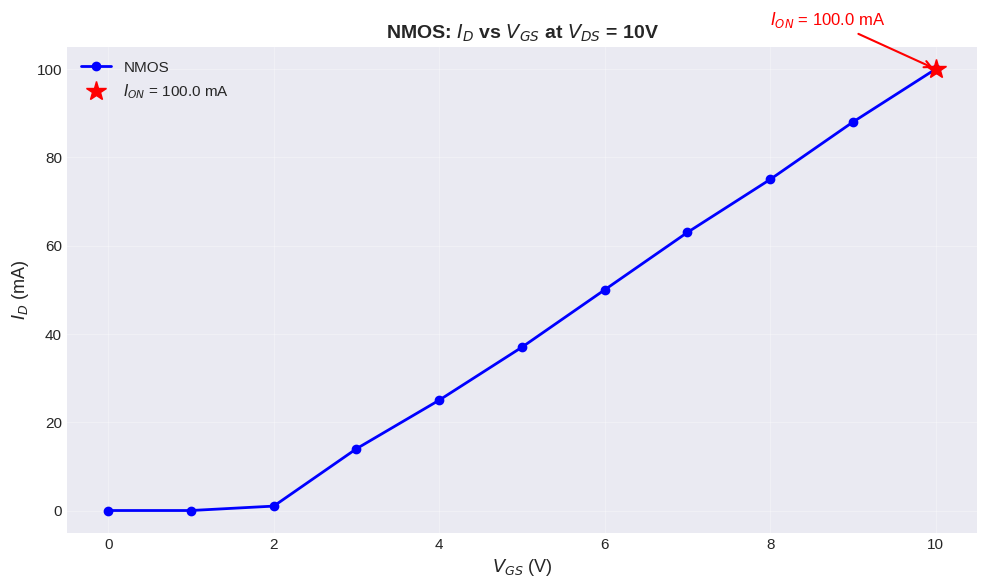

NMOS ION = 100.000 mA at VGS = 10 V


In [ ]:
# Extract ID at VDS=10V for NMOS
ID_at_VDS10_nmos = ID_nmos_part2[:, 3]  # Last column (VDS=10V)
ION_nmos = np.max(ID_at_VDS10_nmos)  # Maximum current = ION
ION_VGS_nmos = VGS_values_nmos[np.argmax(ID_at_VDS10_nmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_nmos, ID_at_VDS10_nmos * 1000, 'b-o', linewidth=2, markersize=6, label='NMOS')
plt.plot(ION_VGS_nmos, ION_nmos * 1000, 'r*', markersize=15, label=f'$I_{{ON}}$ = {ION_nmos*1000:.1f} mA')

# Add annotation
plt.annotate(f'$I_{{ON}}$ = {ION_nmos*1000:.1f} mA',
             xy=(ION_VGS_nmos, ION_nmos*1000),
             xytext=(ION_VGS_nmos-2, ION_nmos*1000+10),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, color='red')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('NMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"NMOS ION = {ION_nmos*1000:.3f} mA at VGS = {ION_VGS_nmos} V")

## 4. Plot ID vs VGS at VDS = 10V with ION labeled (PMOS)

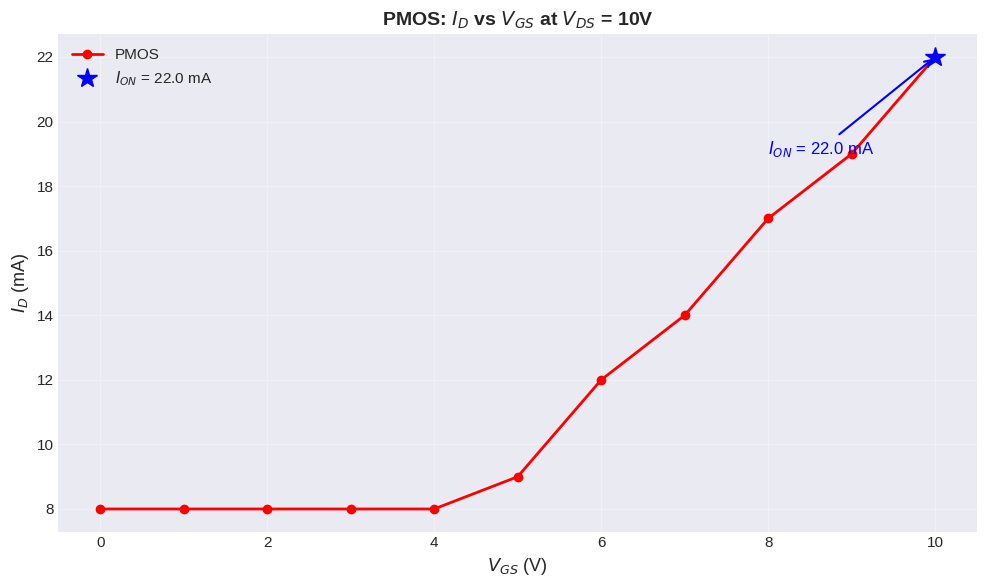

PMOS ION = 22.000 mA at VGS = 10 V


In [ ]:
# Extract ID at VDS=10V for PMOS
ID_at_VDS10_pmos = ID_pmos_part2[:, 3]  # Last column (VDS=10V)
ION_pmos = np.max(ID_at_VDS10_pmos)  # Maximum current = ION
ION_VGS_pmos = VGS_values_pmos[np.argmax(ID_at_VDS10_pmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_pmos, ID_at_VDS10_pmos * 1000, 'r-o', linewidth=2, markersize=6, label='PMOS')
plt.plot(ION_VGS_pmos, ION_pmos * 1000, 'b*', markersize=15, label=f'$I_{{ON}}$ = {ION_pmos*1000:.1f} mA')

# Add annotation
plt.annotate(f'$I_{{ON}}$ = {ION_pmos*1000:.1f} mA',
             xy=(ION_VGS_pmos, ION_pmos*1000),
             xytext=(ION_VGS_pmos-2, ION_pmos*1000-3),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, color='blue')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('PMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"PMOS ION = {ION_pmos*1000:.3f} mA at VGS = {ION_VGS_pmos} V")

## 5. Plot gm vs VGS at VDS = 10V with gm(peak) labeled (NMOS)

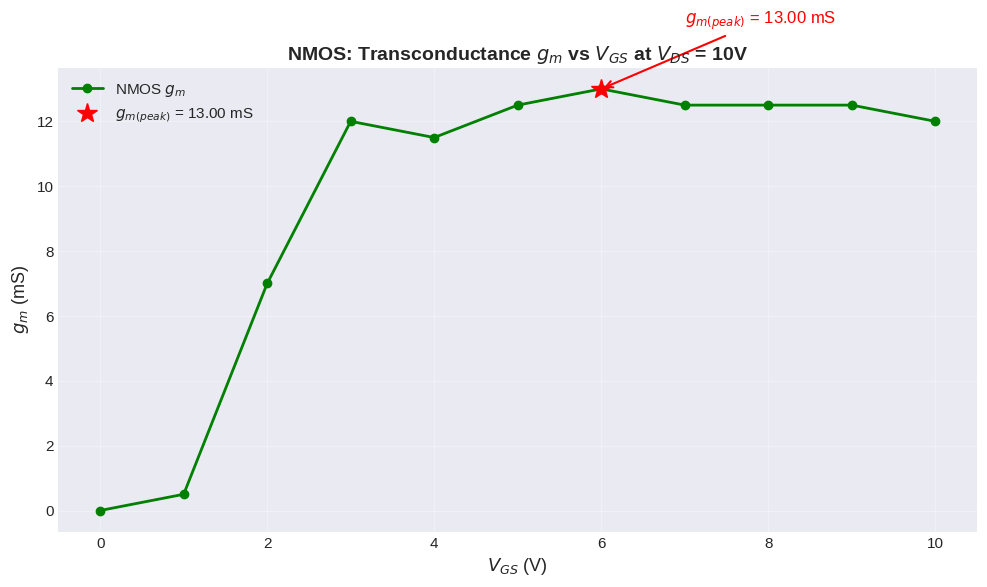

NMOS gm(peak) = 13.000 mS at VGS = 6 V


In [ ]:
# Calculate transconductance gm = ΔID/ΔVGS for NMOS
gm_nmos = np.gradient(ID_at_VDS10_nmos, VGS_values_nmos)
gm_peak_nmos = np.max(gm_nmos)
gm_peak_VGS_nmos = VGS_values_nmos[np.argmax(gm_nmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_nmos, gm_nmos * 1000, 'g-o', linewidth=2, markersize=6, label='NMOS $g_m$')
plt.plot(gm_peak_VGS_nmos, gm_peak_nmos * 1000, 'r*', markersize=15,
         label=f'$g_{{m(peak)}}$ = {gm_peak_nmos*1000:.2f} mS')

# Add annotation
plt.annotate(f'$g_{{m(peak)}}$ = {gm_peak_nmos*1000:.2f} mS',
             xy=(gm_peak_VGS_nmos, gm_peak_nmos*1000),
             xytext=(gm_peak_VGS_nmos+1, gm_peak_nmos*1000+2),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=12, color='red')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$g_m$ (mS)', fontsize=13)
plt.title('NMOS: Transconductance $g_m$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"NMOS gm(peak) = {gm_peak_nmos*1000:.3f} mS at VGS = {gm_peak_VGS_nmos} V")

## 6. Plot gm vs VGS at VDS = 10V with gm(peak) labeled (PMOS)

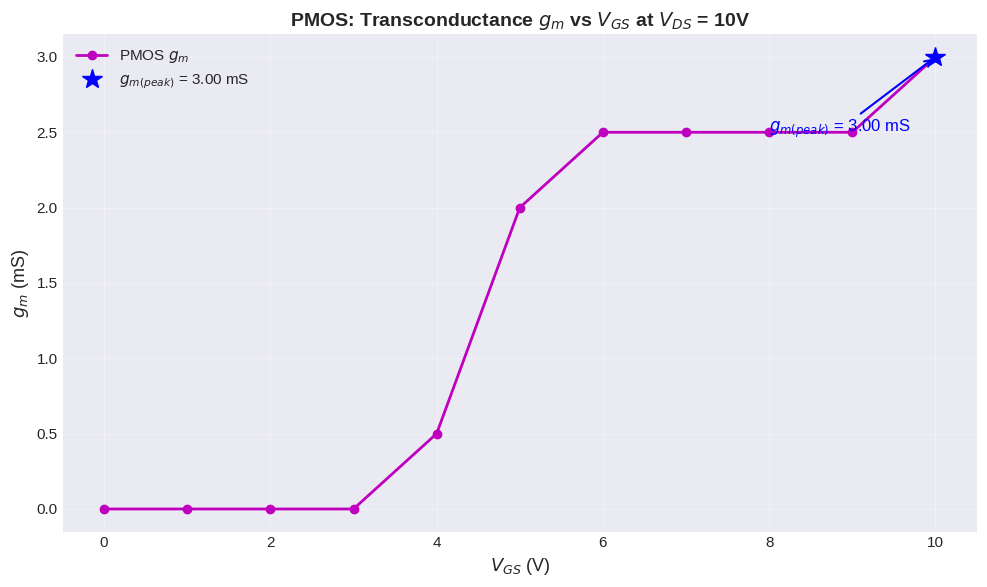

PMOS gm(peak) = 3.000 mS at VGS = 10 V


In [ ]:
# Calculate transconductance gm = ΔID/ΔVGS for PMOS
gm_pmos = np.gradient(ID_at_VDS10_pmos, VGS_values_pmos)
gm_peak_pmos = np.max(gm_pmos)
gm_peak_VGS_pmos = VGS_values_pmos[np.argmax(gm_pmos)]

plt.figure(figsize=(10, 6))
plt.plot(VGS_values_pmos, gm_pmos * 1000, 'm-o', linewidth=2, markersize=6, label='PMOS $g_m$')
plt.plot(gm_peak_VGS_pmos, gm_peak_pmos * 1000, 'b*', markersize=15,
         label=f'$g_{{m(peak)}}$ = {gm_peak_pmos*1000:.2f} mS')

# Add annotation
plt.annotate(f'$g_{{m(peak)}}$ = {gm_peak_pmos*1000:.2f} mS',
             xy=(gm_peak_VGS_pmos, gm_peak_pmos*1000),
             xytext=(gm_peak_VGS_pmos-2, gm_peak_pmos*1000-0.5),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=12, color='blue')

plt.xlabel('$V_{GS}$ (V)', fontsize=13)
plt.ylabel('$g_m$ (mS)', fontsize=13)
plt.title('PMOS: Transconductance $g_m$ vs $V_{GS}$ at $V_{DS}$ = 10V', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

print(f"PMOS gm(peak) = {gm_peak_pmos*1000:.3f} mS at VGS = {gm_peak_VGS_pmos} V")

## 7. Compute Threshold Voltage VT0 (NMOS)

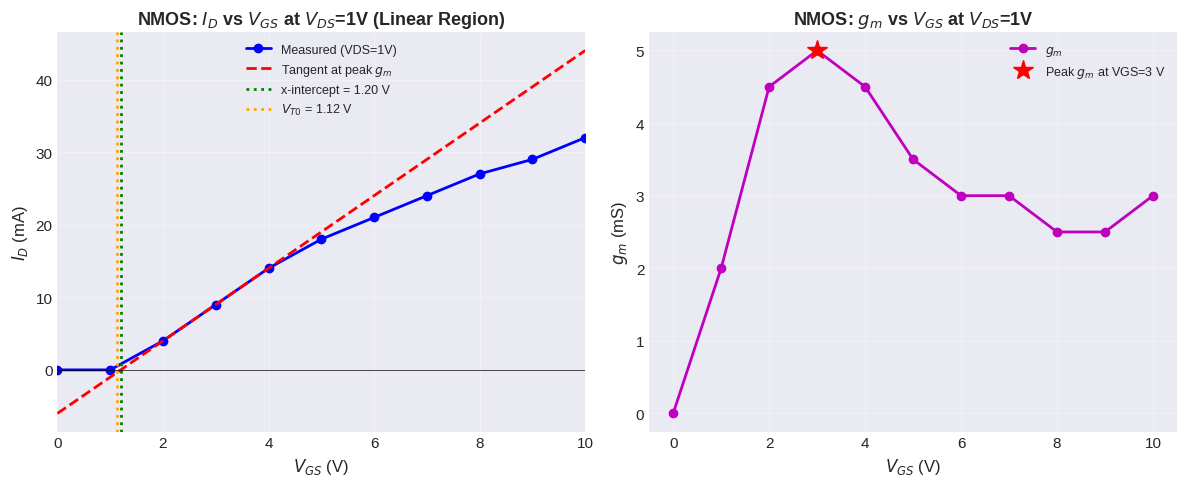

NMOS Threshold Voltage Extraction (Linear Region Method):
  Using VDS = 1V (VDS=0.04V has insufficient current)
  Peak gm location: VGS = 3 V
  Peak gm value: 5.0000 mS
  Tangent line: ID = 5.0000 × VGS + -6.0000 (mA)
  x-axis intercept: 1.200 V
  Thermal correction (3kT/q): 0.0776 V
  VT0 = 1.200 - 0.0776 = 1.122 V


In [ ]:
# Method: Linear region extrapolation using VDS in linear region
# NMOS: Use VDS=1V (VDS=0.04V has insufficient current)
# PMOS: Use VDS=0.04V (has measurable current)

# Extract ID at VDS=1V for NMOS (column index 1)
ID_at_VDS_linear_nmos = ID_nmos_part2[:, 1]  # VDS=1V

# Calculate gm = ΔID/ΔVGS
gm_linear_nmos = np.gradient(ID_at_VDS_linear_nmos, VGS_values_nmos)

# Find peak gm
gm_peak_idx_nmos = np.argmax(gm_linear_nmos)
gm_peak_vgs_nmos = VGS_values_nmos[gm_peak_idx_nmos]

# Draw tangent line at peak gm point
# The tangent line has slope = peak gm value
slope = gm_linear_nmos[gm_peak_idx_nmos]
intercept = ID_at_VDS_linear_nmos[gm_peak_idx_nmos] - slope * gm_peak_vgs_nmos

# Find x-axis intercept (where ID = 0)
x_intercept = -intercept / slope

# Apply thermal voltage correction: VT0 = x-intercept - 3kT/q
k = 1.380649e-23  # Boltzmann constant (J/K)
T = 300  # Temperature (K), room temperature
q = 1.602176634e-19  # Elementary charge (C)
thermal_correction = 3 * k * T / q  # 3kT/q ≈ 0.078V at 300K

VT0_nmos_linear = x_intercept - thermal_correction

# Create tangent line for plotting
VGS_tangent = np.linspace(0, 10, 100)
ID_tangent = slope * VGS_tangent + intercept

# Plot ID vs VGS at VDS=1V with tangent line
plt.figure(figsize=(12, 5))

# Subplot 1: ID vs VGS
plt.subplot(1, 2, 1)
plt.plot(VGS_values_nmos, ID_at_VDS_linear_nmos * 1000, 'bo-', linewidth=2, markersize=6, label='Measured (VDS=1V)')
plt.plot(VGS_tangent, ID_tangent * 1000, 'r--', linewidth=2, label=f'Tangent at peak $g_m$')
plt.axvline(x_intercept, color='g', linestyle=':', linewidth=2, label=f'x-intercept = {x_intercept:.2f} V')
plt.axvline(VT0_nmos_linear, color='orange', linestyle=':', linewidth=2, label=f'$V_{{T0}}$ = {VT0_nmos_linear:.2f} V')
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$I_D$ (mA)', fontsize=12)
plt.title('NMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$=1V (Linear Region)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.xlim(0, 10)

# Subplot 2: gm vs VGS
plt.subplot(1, 2, 2)
plt.plot(VGS_values_nmos, gm_linear_nmos * 1000, 'mo-', linewidth=2, markersize=6, label='$g_m$')
plt.plot(gm_peak_vgs_nmos, gm_linear_nmos[gm_peak_idx_nmos] * 1000, 'r*', markersize=15,
         label=f'Peak $g_m$ at VGS={gm_peak_vgs_nmos} V')
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$g_m$ (mS)', fontsize=12)
plt.title('NMOS: $g_m$ vs $V_{GS}$ at $V_{DS}$=1V', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

print(f"NMOS Threshold Voltage Extraction (Linear Region Method):")
print(f"  Using VDS = 1V (VDS=0.04V has insufficient current)")
print(f"  Peak gm location: VGS = {gm_peak_vgs_nmos} V")
print(f"  Peak gm value: {gm_linear_nmos[gm_peak_idx_nmos]*1000:.4f} mS")
print(f"  Tangent line: ID = {slope*1000:.4f} × VGS + {intercept*1000:.4f} (mA)")
print(f"  x-axis intercept: {x_intercept:.3f} V")
print(f"  Thermal correction (3kT/q): {thermal_correction:.4f} V")
print(f"  VT0 = {x_intercept:.3f} - {thermal_correction:.4f} = {VT0_nmos_linear:.3f} V")

## 8. Compute Threshold Voltage VT0 (PMOS)

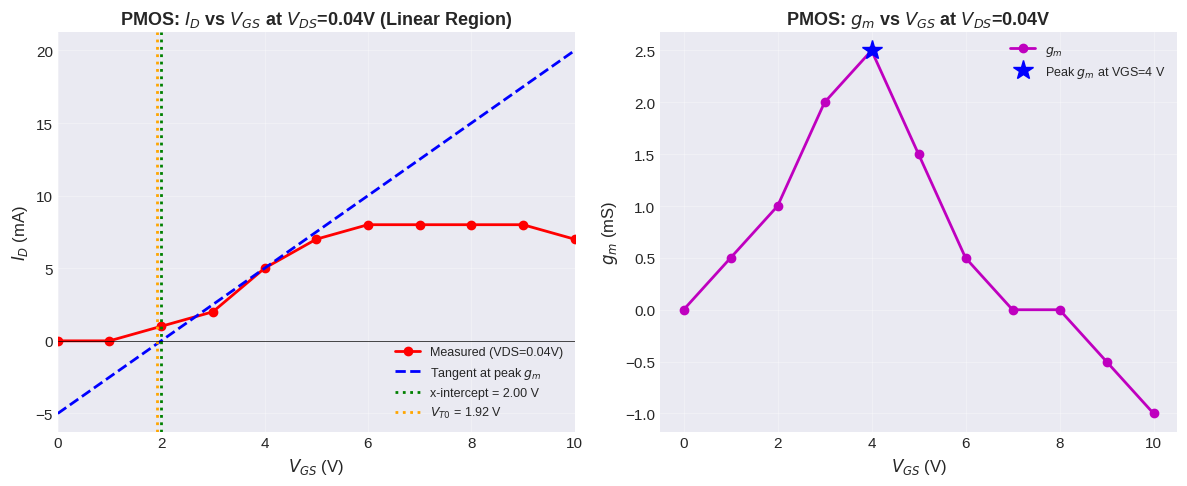

PMOS Threshold Voltage Extraction (Linear Region Method):
  Peak gm location: VGS = 4 V
  Peak gm value: 2.5000 mS
  Tangent line: ID = 2.5000 × VGS + -5.0000 (mA)
  x-axis intercept: 2.000 V
  Thermal correction (3kT/q): 0.0776 V
  VT0 = 2.000 - 0.0776 = 1.922 V


In [ ]:
# Method: Linear region extrapolation at VDS close to zero (VDS=0.04V)

# Extract ID at VDS=0.04V (linear region)
ID_at_VDS004_pmos = ID_pmos_part2[:, 0]  # First column (VDS=0.04V)

# Calculate gm = ΔID/ΔVGS
gm_linear_pmos = np.gradient(ID_at_VDS004_pmos, VGS_values_pmos)

# Find peak gm
gm_peak_idx_pmos = np.argmax(gm_linear_pmos)
gm_peak_vgs_pmos = VGS_values_pmos[gm_peak_idx_pmos]

# Draw tangent line at peak gm point
slope_pmos = gm_linear_pmos[gm_peak_idx_pmos]
intercept_pmos = ID_at_VDS004_pmos[gm_peak_idx_pmos] - slope_pmos * gm_peak_vgs_pmos

# Find x-axis intercept
x_intercept_pmos = -intercept_pmos / slope_pmos

# Apply thermal voltage correction
thermal_correction = 3 * k * T / q
VT0_pmos_linear = x_intercept_pmos - thermal_correction

# Create tangent line for plotting
VGS_tangent_pmos = np.linspace(0, 10, 100)
ID_tangent_pmos = slope_pmos * VGS_tangent_pmos + intercept_pmos

# Plot
plt.figure(figsize=(12, 5))

# Subplot 1: ID vs VGS
plt.subplot(1, 2, 1)
plt.plot(VGS_values_pmos, ID_at_VDS004_pmos * 1000, 'ro-', linewidth=2, markersize=6, label='Measured (VDS=0.04V)')
plt.plot(VGS_tangent_pmos, ID_tangent_pmos * 1000, 'b--', linewidth=2, label=f'Tangent at peak $g_m$')
plt.axvline(x_intercept_pmos, color='g', linestyle=':', linewidth=2, label=f'x-intercept = {x_intercept_pmos:.2f} V')
plt.axvline(VT0_pmos_linear, color='orange', linestyle=':', linewidth=2, label=f'$V_{{T0}}$ = {VT0_pmos_linear:.2f} V')
plt.axhline(0, color='k', linestyle='-', linewidth=0.5)
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$I_D$ (mA)', fontsize=12)
plt.title('PMOS: $I_D$ vs $V_{GS}$ at $V_{DS}$=0.04V (Linear Region)', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)
plt.xlim(0, 10)

# Subplot 2: gm vs VGS
plt.subplot(1, 2, 2)
plt.plot(VGS_values_pmos, gm_linear_pmos * 1000, 'mo-', linewidth=2, markersize=6, label='$g_m$')
plt.plot(gm_peak_vgs_pmos, gm_linear_pmos[gm_peak_idx_pmos] * 1000, 'b*', markersize=15,
         label=f'Peak $g_m$ at VGS={gm_peak_vgs_pmos} V')
plt.xlabel('$V_{GS}$ (V)', fontsize=12)
plt.ylabel('$g_m$ (mS)', fontsize=12)
plt.title('PMOS: $g_m$ vs $V_{GS}$ at $V_{DS}$=0.04V', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9)

plt.tight_layout()
plt.show()

print(f"PMOS Threshold Voltage Extraction (Linear Region Method):")
print(f"  Peak gm location: VGS = {gm_peak_vgs_pmos} V")
print(f"  Peak gm value: {gm_linear_pmos[gm_peak_idx_pmos]*1000:.4f} mS")
print(f"  Tangent line: ID = {slope_pmos*1000:.4f} × VGS + {intercept_pmos*1000:.4f} (mA)")
print(f"  x-axis intercept: {x_intercept_pmos:.3f} V")
print(f"  Thermal correction (3kT/q): {thermal_correction:.4f} V")
print(f"  VT0 = {x_intercept_pmos:.3f} - {thermal_correction:.4f} = {VT0_pmos_linear:.3f} V")

## 9. Plot ID vs VDS and Identify Breakdown Region (NMOS)

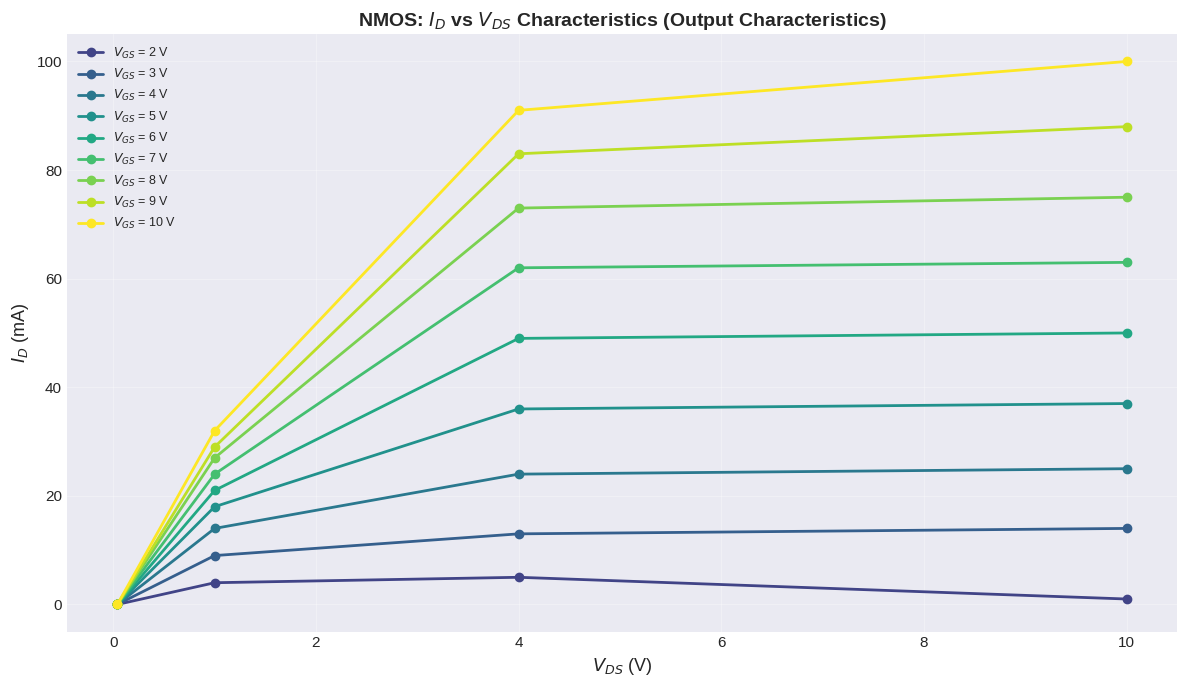

In [ ]:
# Plot ID vs VDS for different VGS values (NMOS)
plt.figure(figsize=(12, 7))

# Plot each VGS curve
colors = plt.cm.viridis(np.linspace(0, 1, len(VGS_values_nmos)))
for i, vgs in enumerate(VGS_values_nmos):
    if np.max(ID_nmos_part2[i, :]) > 0.001:  # Only plot if current is significant
        plt.plot(VDS_values_nmos, ID_nmos_part2[i, :] * 1000, 'o-',
                linewidth=2, markersize=6, color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')

# Add note about breakdown region

plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('NMOS: $I_D$ vs $V_{DS}$ Characteristics (Output Characteristics)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9, loc='upper left')
plt.tight_layout()
plt.show()

## 10. Plot ID vs VDS and Identify Breakdown Region (PMOS)

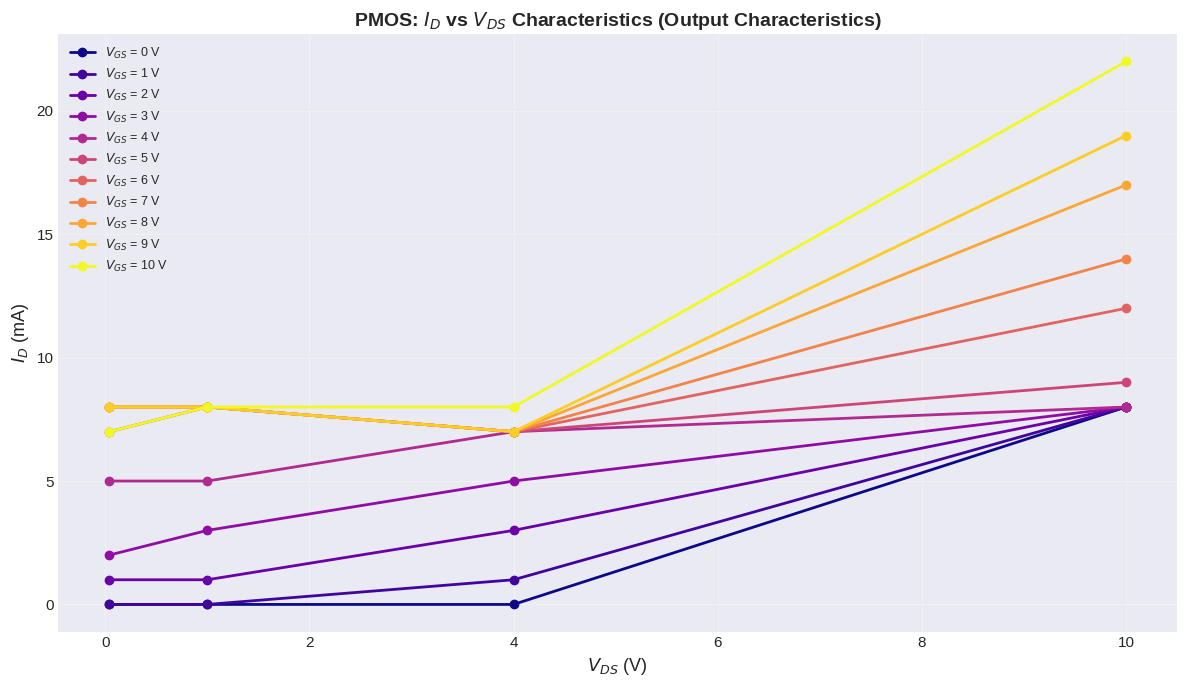

In [ ]:
# Plot ID vs VDS for different VGS values (PMOS)
plt.figure(figsize=(12, 7))

# Plot each VGS curve
colors = plt.cm.plasma(np.linspace(0, 1, len(VGS_values_pmos)))
for i, vgs in enumerate(VGS_values_pmos):
    if np.max(ID_pmos_part2[i, :]) > 0.001:  # Only plot if current is significant
        plt.plot(VDS_values_pmos, ID_pmos_part2[i, :] * 1000, 'o-',
                linewidth=2, markersize=6, color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')


plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('PMOS: $I_D$ vs $V_{DS}$ Characteristics (Output Characteristics)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=9, loc='upper left')
plt.tight_layout()
plt.show()

## 11. Plot gd vs VDS and Extract λ (NMOS)

VGS=4.0V: VA = -2.30 V, λ = -0.4355 V⁻¹
VGS=10.0V: VA = -4.21 V, λ = -0.2374 V⁻¹


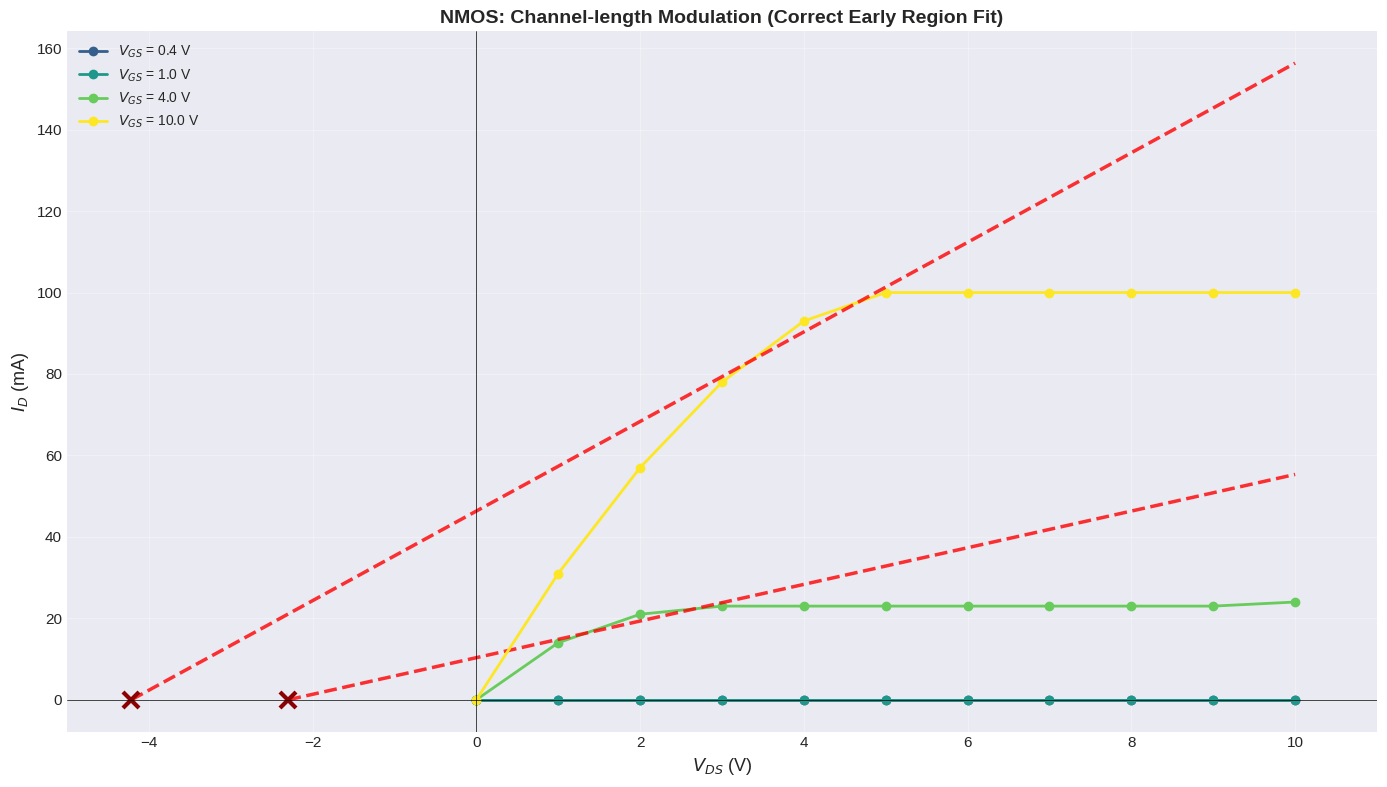


NMOS Average Early Voltage VA = -3.25 V
NMOS Average λ = -0.3364 V⁻¹


In [ ]:
plt.figure(figsize=(14, 8))

lambda_values_nmos = []
VA_values_nmos = []

# Only use these VGS values (exclude 0.4 and 1)
VGS_values_to_use = [4, 10]

# Colors for plot
colors = plt.cm.viridis(np.linspace(0.3, 1, len(VGS_values_nmos_part3)))

for i, vgs in enumerate(VGS_values_nmos_part3):
    ID_curve = ID_nmos_part3[:, i]  # Current in Amperes

    # Plot measured ID-VDS
    plt.plot(VDS_values_nmos_part3, ID_curve * 1000, 'o-', linewidth=2,
             markersize=6, color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')

    # Only extract λ for VGS = 4 and 10
    if vgs in VGS_values_to_use:

        # ---------------------------
        # EARLY REGION SELECTION
        # ---------------------------
        if vgs == 4:
            # Use 1–3 V (small but real slope exists only here)
            sat_indices = (VDS_values_nmos_part3 >= 1.0) & (VDS_values_nmos_part3 <= 3.0)

        elif vgs == 10:
            # At high VGS device saturates early → almost flat slope
            # Use 3–5 V region (still extremely small slope)
            sat_indices = (VDS_values_nmos_part3 >= 3.0) & (VDS_values_nmos_part3 <= 5.0)

        VDS_sat = VDS_values_nmos_part3[sat_indices]
        ID_sat = ID_curve[sat_indices]

        # Only fit if enough points exist
        if len(VDS_sat) >= 2:
            # Fit straight line: ID = slope * VDS + intercept
            slope, intercept = np.polyfit(VDS_sat, ID_sat, 1)

            # Early voltage VA = -intercept / slope
            VA = -intercept / slope if slope != 0 else np.inf

            # Channel-length modulation λ = 1/VA
            lambda_val = 1 / VA if VA != 0 else 0

            # Save results
            VA_values_nmos.append(VA)
            lambda_values_nmos.append(lambda_val)

            # Plot tangent line (extend to left)
            VDS_extended = np.linspace(VA, 10, 200)
            ID_line = slope * VDS_extended + intercept
            plt.plot(VDS_extended, ID_line * 1000, '--', linewidth=2.5,
                     color='red', alpha=0.8)

            # Mark Early voltage intercept
            plt.plot(VA, 0, 'x', markersize=12, markeredgewidth=3, color='darkred')

            print(f"VGS={vgs}V: VA = {VA:.2f} V, λ = {lambda_val:.4f} V⁻¹")


# Plot formatting
plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('NMOS: Channel-length Modulation (Correct Early Region Fit)',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper left')
plt.xlim(-5, 11)
plt.tight_layout()
plt.show()

# Average values
if lambda_values_nmos:
    lambda_avg_nmos = np.mean(lambda_values_nmos)
    VA_avg_nmos = np.mean(VA_values_nmos)
    print(f"\nNMOS Average Early Voltage VA = {VA_avg_nmos:.2f} V")
    print(f"NMOS Average λ = {lambda_avg_nmos:.4f} V⁻¹")




## 12. Plot gd vs VDS and Extract λ (PMOS)

VGS=4.0V: VA = 108786702469054704.00 V, λ = 0.0000 V⁻¹
VGS=10.0V: VA = 1.54 V, λ = 0.6494 V⁻¹


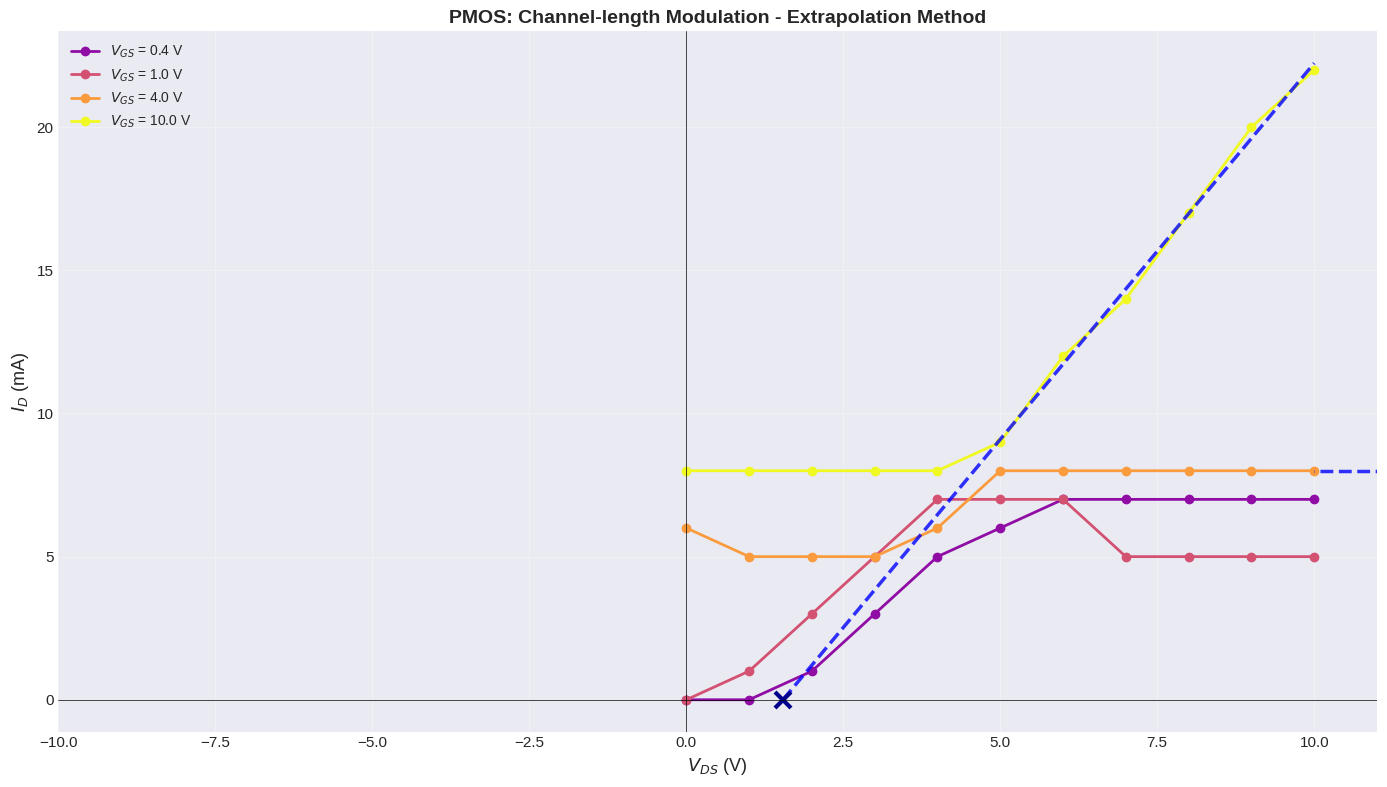


PMOS Average Early Voltage VA = 54393351234527352.00 V
PMOS Average λ = 1/VA = 0.3247 V⁻¹


In [ ]:
# Method: Draw tangent line in saturation region, find x-axis intercept (VA)
# Then calculate λ = 1/VA

plt.figure(figsize=(14, 8))

lambda_values_pmos = []
VA_values_pmos = []

# Plot ID vs VDS characteristics
colors = plt.cm.plasma(np.linspace(0.3, 1, len(VGS_values_pmos_part3)))

for i, vgs in enumerate(VGS_values_pmos_part3):
    ID_curve = ID_pmos_part3[:, i]  # Current in Amperes

    # Plot the measured curve
    plt.plot(VDS_values_pmos_part3, ID_curve * 1000, 'o-', linewidth=2, markersize=6,
             color=colors[i], label=f'$V_{{GS}}$ = {vgs} V')

    # Extract λ for VGS >= 4V (strong inversion)
    if vgs >= 4:
        # Define saturation region (VDS >= 5V)
        sat_indices = VDS_values_pmos_part3 >= 5
        VDS_sat = VDS_values_pmos_part3[sat_indices]
        ID_sat = ID_curve[sat_indices]

        if len(VDS_sat) >= 2:
            # Fit a line to the saturation region: ID = slope * VDS + intercept
            slope, intercept = np.polyfit(VDS_sat, ID_sat, 1)

            # Extrapolate the line to find x-axis intercept (VA)
            VA = -intercept / slope

            # Calculate λ = 1/VA
            lambda_val = 1 / VA if VA != 0 else 0

            # Store values
            VA_values_pmos.append(VA)
            lambda_values_pmos.append(lambda_val)

            # Draw the extrapolated line
            VDS_extended = np.linspace(max(VA, -10), 10, 100)
            ID_line = slope * VDS_extended + intercept
            plt.plot(VDS_extended, ID_line * 1000, '--', linewidth=2.5,
                    color='blue', alpha=0.8)

            # Mark the VA intercept
            plt.plot(VA, 0, 'x', markersize=12, markeredgewidth=3, color='darkblue')

            print(f"VGS={vgs}V: VA = {VA:.2f} V, λ = {lambda_val:.4f} V⁻¹")

plt.axhline(0, color='k', linewidth=0.5)
plt.axvline(0, color='k', linewidth=0.5)
plt.xlabel('$V_{DS}$ (V)', fontsize=13)
plt.ylabel('$I_D$ (mA)', fontsize=13)
plt.title('PMOS: Channel-length Modulation - Extrapolation Method', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10, loc='upper left')
plt.xlim(-10, 11)
plt.tight_layout()
plt.show()

if lambda_values_pmos:
    lambda_avg_pmos = np.mean(lambda_values_pmos)
    VA_avg_pmos = np.mean(VA_values_pmos)
    print(f"\nPMOS Average Early Voltage VA = {VA_avg_pmos:.2f} V")
    print(f"PMOS Average λ = 1/VA = {lambda_avg_pmos:.4f} V⁻¹")

VSG=10.0V: slope=0.0003000000000000003, VA=-24.00 V, λ=-0.0417


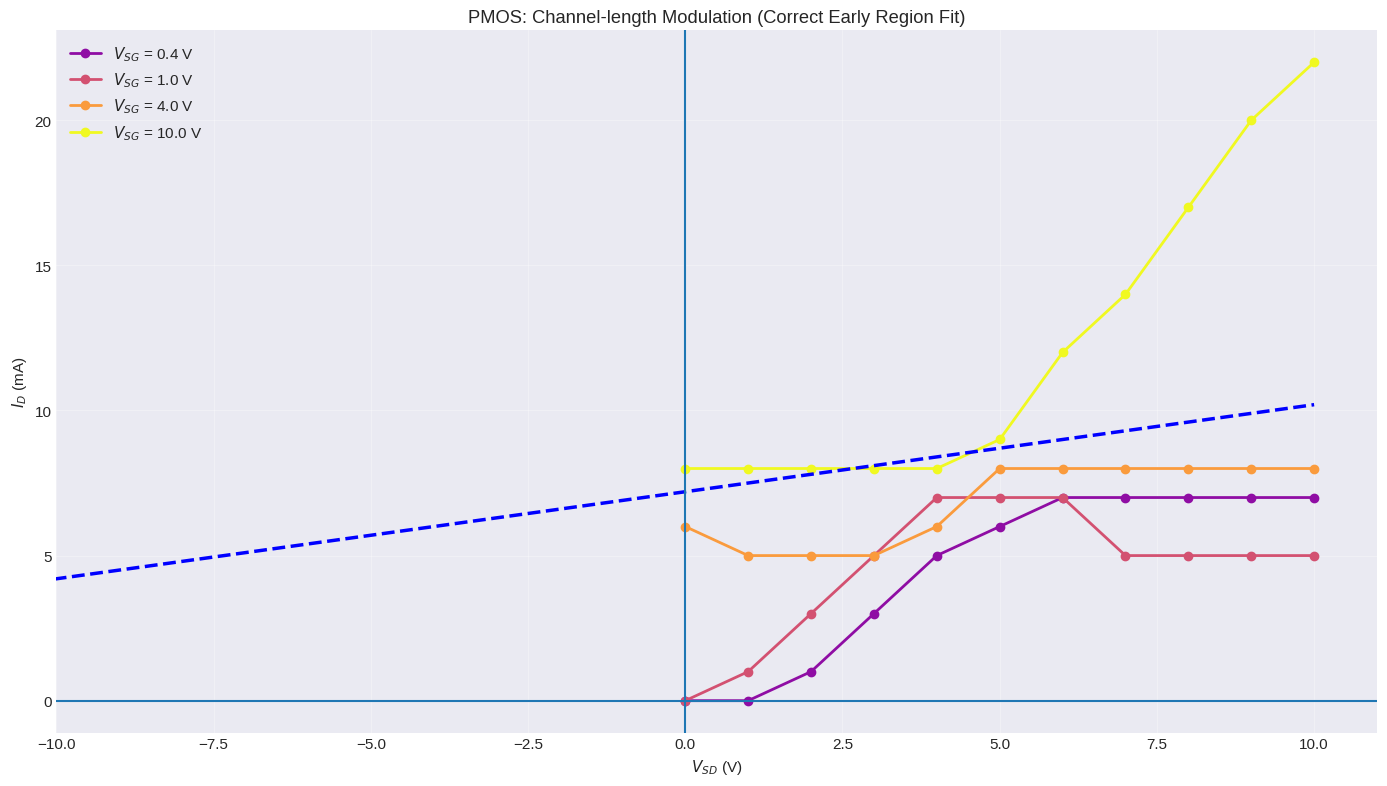


Final PMOS Early Voltage (from VSG=10 only): -23.999999999999968
Final PMOS λ: -0.04166666666666672


In [ ]:
plt.figure(figsize=(14, 8))

lambda_values_pmos = []
VA_values_pmos = []

colors = plt.cm.plasma(np.linspace(0.3, 1, len(VGS_values_pmos_part3)))

for i, vsg in enumerate(VGS_values_pmos_part3):
    ID_curve = ID_pmos_part3[:, i]  # current in Amps

    # Plot measured
    plt.plot(VDS_values_pmos_part3, ID_curve * 1000, 'o-', linewidth=2,
             markersize=6, color=colors[i], label=f'$V_{{SG}}$ = {vsg} V')

    # Only extract lambda for strong inversion (VSG = 10V)
    if vsg == 10:

        # PMOS Early effect appears in VSD = 2–5 V (check data)
        early_region = (VDS_values_pmos_part3 >= 2) & (VDS_values_pmos_part3 <= 5)

        VDS_fit = VDS_values_pmos_part3[early_region]
        ID_fit = ID_curve[early_region]

        slope, intercept = np.polyfit(VDS_fit, ID_fit, 1)

        VA = -intercept / slope
        lambda_val = 1 / VA

        VA_values_pmos.append(VA)
        lambda_values_pmos.append(lambda_val)

        # Plot tangent line
        VDS_ext = np.linspace(VA, 10, 200)
        ID_line = slope * VDS_ext + intercept

        plt.plot(VDS_ext, ID_line * 1000, '--', color='blue', linewidth=2.5)
        plt.plot(VA, 0, 'x', markersize=12, markeredgewidth=3, color='navy')

        print(f"VSG={vsg}V: slope={slope}, VA={VA:.2f} V, λ={lambda_val:.4f}")

plt.axhline(0)
plt.axvline(0)
plt.xlabel("$V_{SD}$ (V)")
plt.ylabel("$I_D$ (mA)")
plt.title("PMOS: Channel-length Modulation (Correct Early Region Fit)")
plt.grid(alpha=0.3)
plt.legend()
plt.xlim(-10, 11)
plt.tight_layout()
plt.show()

if lambda_values_pmos:
    print("\nFinal PMOS Early Voltage (from VSG=10 only):", np.mean(VA_values_pmos))
    print("Final PMOS λ:", np.mean(lambda_values_pmos))


## Summary of Results

In [ ]:
print("="*60)
print("ECE335 Lab 3 - MOSFET Characterization Results Summary")
print("="*60)
print("\n--- NMOS Transistor ---")
print(f"1. ION (at VDS=10V): {ION_nmos*1000:.3f} mA")
print(f"2. gm(peak): {gm_peak_nmos*1000:.3f} mS at VGS={gm_peak_VGS_nmos} V")
print(f"3. Threshold Voltage VT0: {VT0_nmos:.3f} V")
if lambda_values_nmos:
    print(f"4. Channel-length modulation λ: {lambda_avg_nmos:.4f} V⁻¹")
    print(f"   Early Voltage VA = 1/λ: {1/lambda_avg_nmos:.2f} V")

print("\n--- PMOS Transistor ---")
print(f"1. ION (at VDS=10V): {ION_pmos*1000:.3f} mA")
print(f"2. gm(peak): {gm_peak_pmos*1000:.3f} mS at VGS={gm_peak_VGS_pmos} V")
print(f"3. Threshold Voltage VT0: {VT0_pmos:.3f} V")
if lambda_values_pmos:
    print(f"4. Channel-length modulation λ: {lambda_avg_pmos:.4f} V⁻¹")
    print(f"   Early Voltage VA = 1/λ: {1/lambda_avg_pmos:.2f} V")

print("\n" + "="*60)
print("Note: PMOS VDS=4V data was interpolated from VDS=1V and VDS=10V")
print("="*60)